# 데이터 로드

In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data, meta = arff.loadarff('./dataset/FordA_TRAIN.arff')
df = pd.DataFrame(data)

data, meta = arff.loadarff('./dataset/FordA_TEST.arff')
df1 = pd.DataFrame(data)
df

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att492,att493,att494,att495,att496,att497,att498,att499,att500,target
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,b'-1'
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,b'1'
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,b'-1'
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,b'-1'
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,b'-1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,0.196022,-0.070102,-0.336226,-0.516799,-0.555282,-0.442793,-0.221369,0.025217,0.233320,0.350545,...,1.129082,0.528158,-0.039020,-0.573043,-1.061479,-1.514392,-1.934743,-2.316612,-2.603753,b'-1'
3597,0.041994,0.422255,0.740529,0.975426,1.109891,1.137270,1.058349,0.894955,0.671224,0.421544,...,-0.392667,-0.333749,-0.316543,-0.340299,-0.392876,-0.450805,-0.482609,-0.467769,-0.393755,b'1'
3598,-0.570054,-0.333165,-0.293519,-0.425344,-0.590869,-0.615648,-0.348033,0.275412,1.153586,2.035725,...,0.579700,0.157463,-0.353980,-0.885246,-1.314421,-1.512655,-1.393714,-0.942733,-0.270722,b'-1'
3599,2.006732,2.079150,2.022036,1.867560,1.648112,1.379446,1.093717,0.784057,0.434150,0.029284,...,1.148971,0.928088,0.634953,0.311682,-0.007376,-0.270543,-0.432145,-0.441231,-0.280709,b'1'


# 데이터 상관 계수 분석

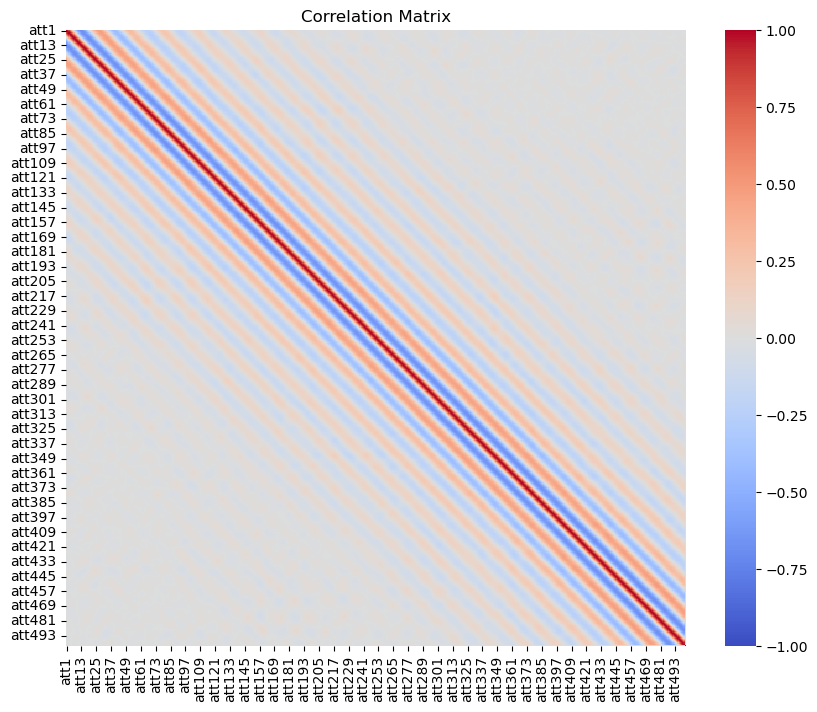

In [2]:
# 상관 행렬 계산
corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Matrix')
plt.show()

# 상관 관계 분석 및 시각화 - 히트맵을 통해 근처 센서간의 연관성 높다는 것 파악가능하다.
# !!!!!!!특성 숫자가 나타내는 것이 무엇인지? (가능하면 파악하기)!!!!!!!!!

# ROC 곡선 함수

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding, LSTM, Flatten, MaxPooling1D, BatchNormalization, Dropout, TimeDistributed, Conv1D, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau


from time import time

def draw_roc_keras(model, xt, yt):
    # 예측값 생성
    predictions = model.predict(xt)
    # 이진 분류 조정: 예측 값이 두 클래스의 확률일 경우, 긍정 클래스의 확률을 선택
    # => ROC 곡선을 그릴 때 주로 긍정 클래스에 대한 성능을 평가
    if predictions.shape[1] == 2:
        predictions = predictions[:, 1] # 긍정 클래스가 두 번째 클래스

    # ROC 곡선 계산: 실제 라벨 'yt'과 예측 확률을 사용하여 FPR(위양성률), TPF(진양성률), 임계값을 계산
    fpr, tpr, thr = roc_curve(yt, predictions)
    # AUC 계산 (1에 가까울수록 성능이 좋음)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    # ROC 곡선 그리기
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return predictions


# 데이터 전처리

In [4]:
from scipy.io.arff import loadarff

# ARFF 파일을 읽어서 2D numpy 배열로 변환하는 함수 (후속 데이터 분석이나 모델 학습에 이용하기 위해)
def read_ariff(path):
    
    raw_data, meta =loadarff(path)
    # 메타데이터에서 칼럼 이름 추출
    cols=[x for x in meta]
    # 빈 2D 배열 생성
    data2d=np.zeros([raw_data.shape[0],len(cols)])
    # 칼럼 순회하며 데이터 할당
    for i,col in zip(range(len(cols)),cols): 
        data2d[:,i]=raw_data[col]
        
    return data2d


train_path="./dataset/FordA_TRAIN.arff"
test_path="./dataset/FordA_TEST.arff"

data2d=read_ariff(train_path)
test2d=read_ariff(test_path)
print(data2d.shape, test2d.shape)


(3601, 501) (1320, 501)


# data2d 배열의 특정 행 데이터 시각화

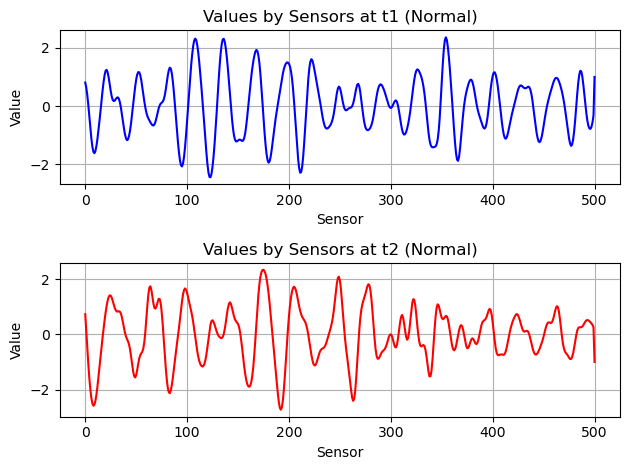

In [5]:
# 첫 번째 subplot: t1 시간대 (data2d[1, :])
plt.subplot(2, 1, 1)  # 2행 1열 중 첫 번째 subplot
plt.plot(data2d[1, :], linestyle='-', color='b')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.title('Values by Sensors at t1 (Normal)')
plt.grid(True)  # 그리드 추가

# 두 번째 subplot: t2 시간대 (data2d[2, :])
plt.subplot(2, 1, 2)  # 2행 1열 중 두 번째 subplot
plt.plot(data2d[2, :],  linestyle='-', color='r')
plt.xlabel('Sensor')
plt.ylabel('Value')
plt.title('Values by Sensors at t2 (Normal)')
plt.grid(True)  # 그리드 추가


# 전체 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

plt.tight_layout()  # 레이아웃 조정
plt.show()

In [6]:
# 배열을 생성하여 불량, 정상 샘플을 분류
failed=data2d[data2d[:,-1]==1]
not_failed=data2d[data2d[:,-1]==-1]
print(failed.shape, not_failed.shape)

train2d=np.concatenate((failed[:int(0.8*failed.shape[0])],
                       not_failed[:int(0.8*failed.shape[0])]),
                       axis=0)

val2d=np.concatenate((failed[int(0.8*failed.shape[0]):],
                       not_failed[int(0.8*failed.shape[0]):]),
                       axis=0)

np.random.shuffle(train2d)
np.random.shuffle(val2d)

print(train2d.shape, val2d.shape)

(1755, 501) (1846, 501)
(2808, 501) (793, 501)


In [7]:
# 2D 데이터를 3D 데이터로 변환하는 함수
def make3d(data):
    df=data.copy()
    x,y=df.shape
    data3d=np.zeros([x,y-1,2])
    for i in range(x):
        data3d[i,:,0]=df[i][:-1].T
        data3d[i,:,1]=np.full((y-1),df[i][-1])
    return data3d

train3d=make3d(train2d)
val3d  =make3d(val2d)
test3d =make3d(test2d)
print(train3d.shape, val3d.shape, test3d.shape)

(2808, 500, 2) (793, 500, 2) (1320, 500, 2)


# 데이터 정규화 (Scaling the data)

In [8]:
def scale_d(data):
    df=data.copy()
    df_scaled=np.zeros(df.shape)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    stder = StandardScaler()
    # scaler = scaler.fit(df[0])
    for i in range(df.shape[0]):
        df_scaled[i,:,0]=stder.fit_transform(
                                         df[i,:,0].reshape((df.shape[1], 1))
                                         ).reshape((df.shape[1]))

        df_scaled[i,:,1]=df[i,:,1]
    return df_scaled

train_scaled=scale_d(train3d)
val_scaled  =scale_d(val3d)
test_scaled =scale_d(test3d)

x_train = np.expand_dims(train_scaled[:,:,0],axis=2)
x_val   =np.expand_dims(val_scaled[:,:,0],axis=2)
x_test  =np.expand_dims(test_scaled[:,:,0],axis=2)

y_train  =train_scaled[:,:,1]
y_val   =val_scaled[:,:,1]
y_test  =test_scaled[:,:,1]

y_train_e=np.expand_dims(y_train,axis=2)
y_val_e =np.expand_dims(y_val,axis=2)
y_test_e=np.expand_dims(y_test,axis=2)

y_train_s=y_train[:,0]
y_train_s=np.array([1. if x==1 else 0. for x in y_train[:,0]])

y_val_s =y_val[:,0]
y_val_s=np.array([1. if x==1 else 0. for x in y_val[:,0]])

y_test_s=y_test[:,0]
y_test_s=np.array([1. if x==1 else 0. for x in y_test[:,0]])

print(x_train.shape,x_val.shape,x_test.shape)

print(y_train.shape,y_val.shape,y_test.shape)
print()
print(y_train_e.shape,y_val_e.shape,y_test_e.shape)

print(y_train_s.shape,y_val_s.shape,y_test_s.shape)


(2808, 500, 1) (793, 500, 1) (1320, 500, 1)
(2808, 500) (793, 500) (1320, 500)

(2808, 500, 1) (793, 500, 1) (1320, 500, 1)
(2808,) (793,) (1320,)


In [9]:
y_test_s

array([0., 0., 0., ..., 1., 1., 1.])

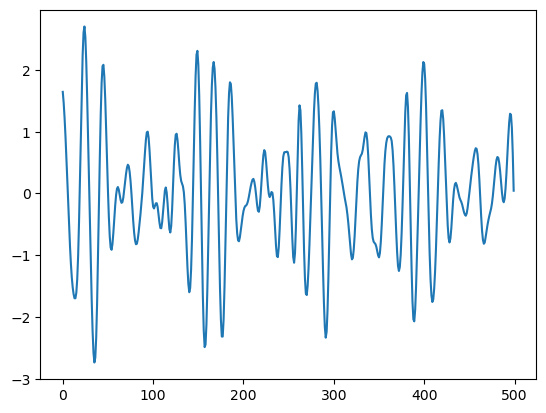

In [10]:
plt.plot(x_train[11,:,0])
plt.show()

# Batch genereator function

In [42]:
# 시퀀스 형태의 데이터 생성
def batch_generator(data_x,data_y,sequence_length):
    """
    Generator function for creating random batches of training-data.
    """
    df_x=data_x.copy()
    df_y=data_y.copy()
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (df_x.shape[0], sequence_length, df_x.shape[2])
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (df_y.shape[0], sequence_length, df_y.shape[2])
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(df_x.shape[0]):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(df_x.shape[1] - sequence_length)
#             print(idx,idx+sequence_length)
            # Copy the sequences of data starting at this index.
            x_batch[i] = df_x[i,idx:idx+sequence_length,:]
            y_batch[i] = df_y[i,idx:idx+sequence_length,:]
        
        yield (x_batch, y_batch)


# 시퀀스와 이진 출력 형태의 데이터 생성
def batch_generator_s(data_x,data_y,sequence_length):
    """
    Generator function for creating random batches of training-data.
    """
    df_x=data_x.copy()
    df_y=data_y.copy()
    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (df_x.shape[0], sequence_length, df_x.shape[2])
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (df_y.shape[0], 1)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(df_x.shape[0]):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(df_x.shape[1] - sequence_length)
#             print(idx,idx+sequence_length)
            # Copy the sequences of data starting at this index.
            x_batch[i] = df_x[i,idx:idx+sequence_length,:]
        y_batch = df_y
        
        yield (x_batch, y_batch)
        


# Function to load best callback

In [43]:
class GetBest(Callback):

    def __init__(self, monitor='val_loss', verbose=0,
                 mode='auto', period=1):
        super(GetBest, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.period = period
        self.best_epochs = 0
        self.epochs_since_last_save = 0

        if mode not in ['auto', 'min', 'max']:
            warnings.warn('GetBest mode %s is unknown, '
                          'fallback to auto mode.' % (mode),
                          RuntimeWarning)
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
                self.best = -np.Inf
            else:
                self.monitor_op = np.less
                self.best = np.Inf
                
    def on_train_begin(self, logs=None):
        self.best_weights = self.model.get_weights()

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            #filepath = self.filepath.format(epoch=epoch + 1, **logs)
            current = logs.get(self.monitor)
            if current is None:
                warnings.warn('Can pick best model only with %s available, '
                              'skipping.' % (self.monitor), RuntimeWarning)
            else:
                if self.monitor_op(current, self.best):
                    if self.verbose > 0:
                        print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                              ' storing weights.'
                              % (epoch + 1, self.monitor, self.best,
                                 current))
                    self.best = current
                    self.best_epochs = epoch + 1
                    self.best_weights = self.model.get_weights()
                else:
                    if self.verbose > 0:
                        print('\nEpoch %05d: %s did not improve' %
                              (epoch + 1, self.monitor))            
                    
    def on_train_end(self, logs=None):
        if self.verbose > 0:
            print('Using epoch %05d with %s: %0.5f' % (self.best_epochs, self.monitor,
                                                       self.best))
        self.model.set_weights(self.best_weights)

# LSTM

2024-06-26 17:17:08.312493: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-06-26 17:17:08.312553: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-06-26 17:17:08.312562: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-06-26 17:17:08.312751: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-26 17:17:08.312767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/1tae/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential m

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 350, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 35000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     3,500,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,541,001 (13.51 MB)

 Trainable params: 3,541,001 (13.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


2024-06-26 17:17:08.820916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5878 - loss: 0.7454Epoch 1: val_accuracy improved to 0.65322
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5884 - loss: 0.7440 - val_accuracy: 0.6532 - val_loss: 0.6099
Epoch 2/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6629 - loss: 0.6086Epoch 2: val_accuracy improved to 0.65448
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6631 - loss: 0.6083 - val_accuracy: 0.6545 - val_loss: 0.6308
Epoch 3/60
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7199 - loss: 0.5602Epoch 3: val_accuracy improved to 0.68348
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7196 - loss: 0.5604 - val_accuracy: 0.6835 - val_loss: 0.5914
Epoch 4/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7449 - loss: 0.5319 - val_accuracy: 0.6734 - val_loss: 0.6382
Epoch 5/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7705 - loss: 0.5067 - val_accuracy: 0.6696 - val_loss: 0.6282
Epoch 6/60
50/50 ━━━━━━━━━━━━━━

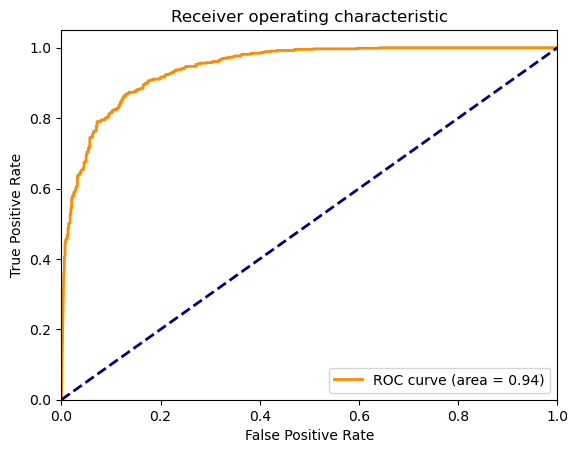

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


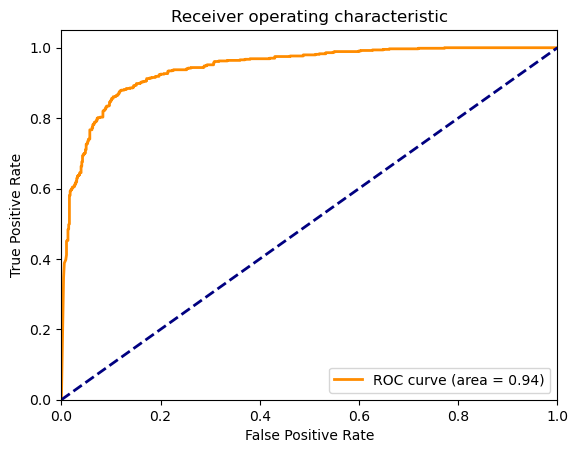

compile_metrics: 86.29%


In [11]:
seq_len = 350
STEPS = 50
EPOCHS = 60

NAME = f"td_fordA-{seq_len}seq_{int(time())}"
model_d = Sequential()

model_d.add(LSTM(units=100,
                 return_sequences=True,
                 input_shape=(seq_len, 1)))

model_d.add(Flatten())
model_d.add(Dense(100, activation='relu'))
model_d.add(Dense(1, activation='sigmoid'))

model_d.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_d.summary()

# batch_generator_s 함수 정의 필요
def batch_generator_s(x, y, seq_len, batch_size=32):
    num_samples = len(x)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_x = x[offset:offset+batch_size, :seq_len, :]
            batch_y = y[offset:offset+batch_size]
            yield batch_x, batch_y

# x_train, y_train_s, x_val, y_val_s, x_test, y_test_s 변수가 정의되어 있다고 가정
gen_train = batch_generator_s(x_train, y_train_s, seq_len)
gen_val = batch_generator_s(x_val, y_val_s, seq_len)

tensorboard = TensorBoard(log_dir='Logs/{}'.format(NAME))

checkp = ModelCheckpoint('./LSTM_best.weights.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', save_freq='epoch')

class GetBest(Callback):
    def __init__(self, monitor='val_accuracy', verbose=1, mode='max'):
        super(GetBest, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.mode = mode
        self.best = -np.Inf if mode == 'max' else np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get(self.monitor)
        if self.mode == 'max':
            if current > self.best:
                self.best = current
                if self.verbose:
                    print(f'Epoch {epoch+1}: {self.monitor} improved to {self.best:.5f}')
        else:
            if current < self.best:
                self.best = current
                if self.verbose:
                    print(f'Epoch {epoch+1}: {self.monitor} improved to {self.best:.5f}')

best = GetBest(monitor='val_accuracy', verbose=1, mode='max')

callbacks = [best, tensorboard, checkp]

model_d.fit(gen_train,
            epochs=EPOCHS,
            steps_per_epoch=STEPS,
            validation_data=gen_val,
            validation_steps=STEPS,
            callbacks=callbacks)

scores = model_d.evaluate(x_test[:, :seq_len, :], y_test_s, verbose=0)
print("%s: %.2f%%" % (model_d.metrics_names[1], scores[1] * 100))

pred = draw_roc_keras(model_d, x_test[:, :seq_len, :], y_test_s)
print("%s: %.2f%%" % (model_d.metrics_names[1], scores[1] * 100))


# test

In [12]:
gen_test =batch_generator_s(x_test,y_test_s,seq_len)
for i in range(100):
    x_batch, y_batch= next(gen_test)
    scores = model_d.evaluate([x_batch], y_batch, verbose=0)
    print("%s: %.2f%%" % (model_d.metrics_names[1], scores[1]*100))
#     pred=draw_roc_keras(model_d,[x_batch],y_batch)

compile_metrics: 93.75%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 84.38%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 90.62%
compile_metrics: 78.12%
compile_metrics: 78.12%
compile_metrics: 90.62%
compile_metrics: 75.00%
compile_metrics: 84.38%
compile_metrics: 90.62%
compile_metrics: 90.62%
compile_metrics: 100.00%
compile_metrics: 87.50%
compile_metrics: 93.75%
compile_metrics: 96.88%
compile_metrics: 78.12%
compile_metrics: 78.12%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 93.75%
compile_metrics: 93.75%
compile_metrics: 84.38%
compile_metrics: 78.12%
compile_metrics: 81.25%
compile_metrics: 75.00%
compile_metrics: 84.38%
compile_metrics: 96.88%
compile_metrics: 75.00%
compile_metrics: 87.50%
compile_metrics: 87.50%
compile_metrics: 90.62%
compile_metrics: 81.25%
compile_metrics: 87.50%
compile_metrics: 84.38%
compile_metrics: 87.50%
compile_metrics: 84.38%
compile_metrics

In [13]:
# 예측 수행
pred = model_d.predict(gen_test, steps=10, verbose=0)
print(pred.shape)
pred

(320, 1)


array([[9.5077789e-01],
       [1.4995026e-09],
       [1.0000000e+00],
       [3.2004049e-05],
       [9.9999511e-01],
       [8.5881762e-12],
       [1.0000000e+00],
       [9.9998176e-01],
       [6.6422062e-11],
       [9.3459034e-01],
       [1.0000000e+00],
       [9.9990261e-01],
       [1.0000000e+00],
       [2.0540019e-06],
       [3.8727049e-07],
       [1.0000000e+00],
       [2.2654723e-07],
       [9.8534518e-01],
       [1.1876224e-07],
       [1.0000000e+00],
       [9.9984360e-01],
       [1.9107751e-05],
       [1.7412659e-04],
       [1.0000000e+00],
       [1.3421917e-15],
       [3.4806959e-05],
       [1.7423751e-13],
       [1.0000000e+00],
       [8.2847482e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.4672134e-05],
       [8.7469459e-01],
       [1.0000000e+00],
       [3.9276456e-05],
       [1.0000000e+00],
       [1.1416821e-02],
       [1.0000000e+00],
       [1.1631411e-09],
       [1.0000000e+00],
       [9.9503642e-01],
       [2.855594

In [ ]:
# 센서 500개 시점 3600개, 한 시점마다 불량 여부 있었음. 이거를 학습해서, 불량 범위를 구해서, 비교한다.